Populating the interactive namespace from numpy and matplotlib
Creating networks and loading parameters


/home/sunny/.local/share/virtualenvs/face-detection-mtcnn-EKyvIa_L/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


找到人脸数目为：26
[[3.78578627e+03 1.75625163e+03 3.91348894e+03 1.92063227e+03
  9.99999642e-01]
 [1.75666426e+03 1.70658581e+03 1.88091997e+03 1.86923668e+03
  9.99998569e-01]
 [4.10387722e+03 1.78279030e+03 4.23137293e+03 1.92979681e+03
  9.99998331e-01]
 [3.12427180e+03 1.78017954e+03 3.24247112e+03 1.93466346e+03
  9.99996543e-01]
 [2.87642055e+03 1.58282812e+03 2.98588314e+03 1.71531231e+03
  9.99995828e-01]
 [3.51882444e+03 1.60922769e+03 3.62223210e+03 1.73073257e+03
  9.99995589e-01]
 [1.10797535e+03 1.56795252e+03 1.21145141e+03 1.69813989e+03
  9.99994159e-01]
 [2.84305850e+03 1.73321096e+03 2.96350856e+03 1.88323201e+03
  9.99994040e-01]
 [1.39447308e+03 1.71772511e+03 1.52587948e+03 1.87793268e+03
  9.99991298e-01]
 [3.81029336e+03 1.58236678e+03 3.92264618e+03 1.72536179e+03
  9.99987006e-01]
 [7.76825892e+02 1.59577791e+03 8.84096366e+02 1.72341709e+03
  9.99986410e-01]
 [3.23245904e+03 1.59943126e+03 3.32939958e+03 1.73377311e+03
  9.99975801e-01]
 [1.05729083e+03 1.69624629e+

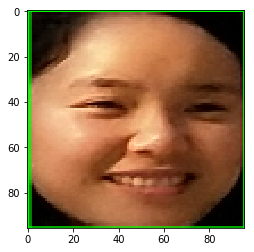

[1756 1706 1880 1869]
(96, 96, 3)


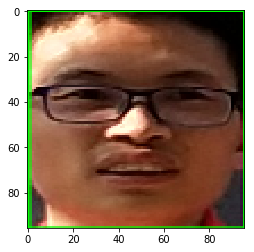

[4103 1782 4231 1929]
(96, 96, 3)


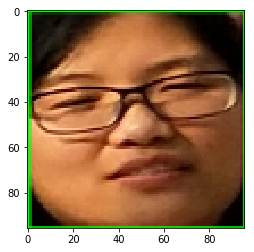

[3124 1780 3242 1934]
(96, 96, 3)


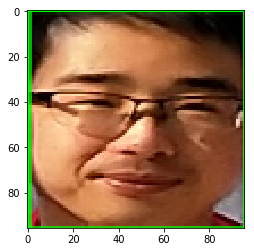

[2876 1582 2985 1715]
(96, 96, 3)


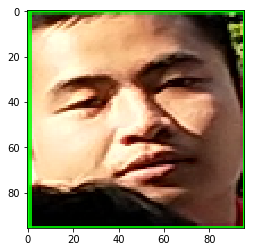

[3518 1609 3622 1730]
(96, 96, 3)


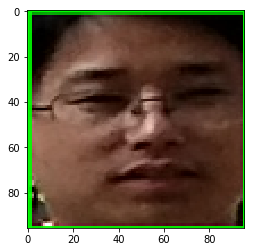

[1107 1567 1211 1698]
(96, 96, 3)


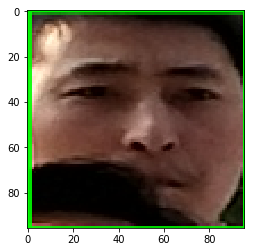

[2843 1733 2963 1883]
(96, 96, 3)


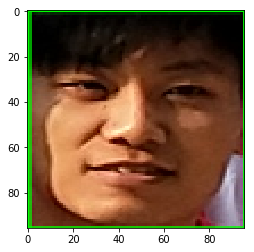

[1394 1717 1525 1877]
(96, 96, 3)


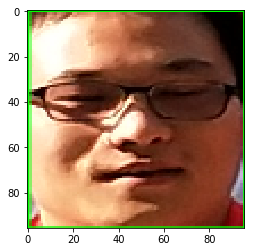

[3810 1582 3922 1725]
(96, 96, 3)


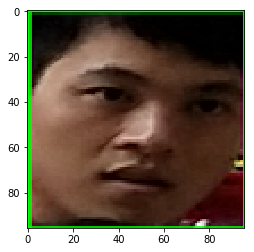

[ 776 1595  884 1723]
(96, 96, 3)


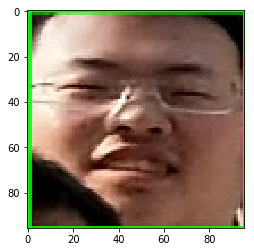

[3232 1599 3329 1733]
(96, 96, 3)


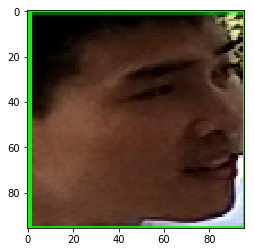

[1057 1696 1185 1859]
(96, 96, 3)


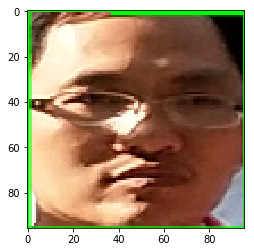

[4045 1593 4157 1730]
(96, 96, 3)


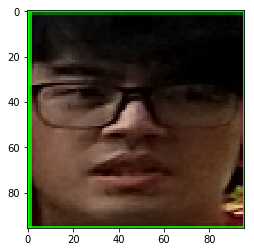

[3437 1780 3561 1931]
(96, 96, 3)


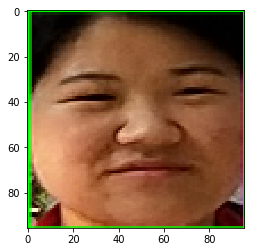

[2482 1624 2609 1782]
(96, 96, 3)


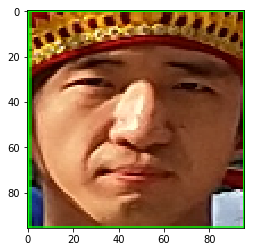

[2102 1700 2239 1880]
(96, 96, 3)


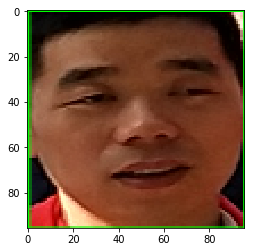

[2630 1617 2728 1744]
(96, 96, 3)


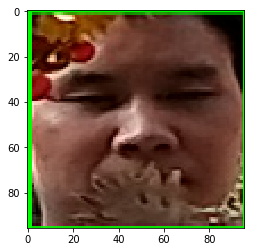

[1440 1597 1553 1727]
(96, 96, 3)


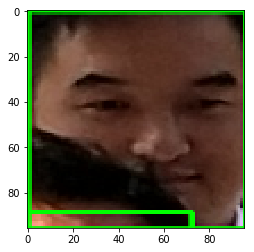

[2061 1575 2165 1709]
(96, 96, 3)


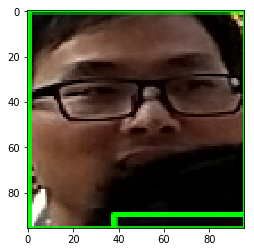

[2354 1596 2443 1711]
(96, 96, 3)


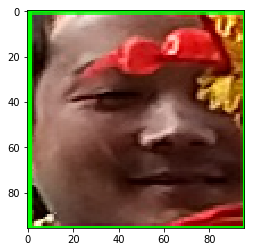

[ 665 1701  818 1899]
(96, 96, 3)


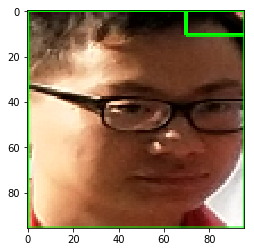

[ 420 1902  459 1947]
(96, 96, 3)


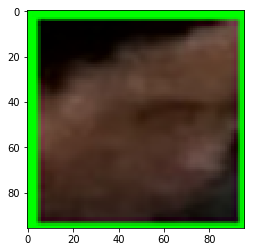

[ 330 1810  357 1840]
(96, 96, 3)


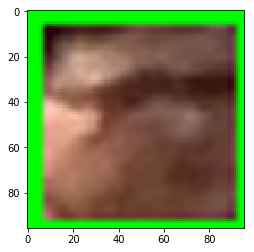

[4542 1810 4557 1828]
(96, 96, 3)


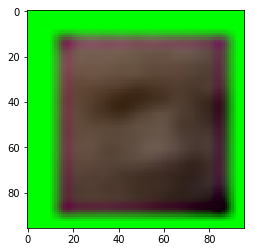

[3817 3017 3837 3043]
(96, 96, 3)


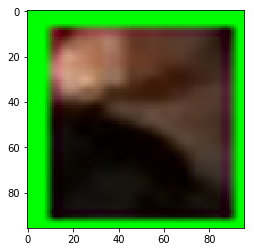

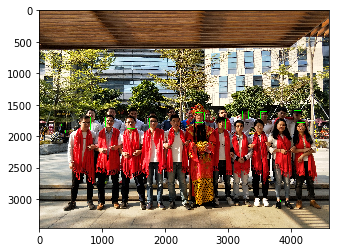

In [12]:
# %load face-detection.py
from scipy import misc
import tensorflow as tf
import detect_face
import cv2
import matplotlib.pyplot as plt
%pylab inline

minsize = 20 # minimum size of face
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold
factor = 0.709 # scale factor
gpu_memory_fraction=1.0


print('Creating networks and loading parameters')

with tf.Graph().as_default():
        gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)
        #sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=False))
        sess = tf.Session(config=tf.ConfigProto(device_count = {'GPU': 0}, log_device_placement=True))
        with sess.as_default():
            pnet, rnet, onet = detect_face.create_mtcnn(sess, None)

image_path = 'facedata/mmexport1516269316730.jpg'

img = misc.imread(image_path)
bounding_boxes, _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)
nrof_faces = bounding_boxes.shape[0]#人脸数目
print('找到人脸数目为：{}'.format(nrof_faces))

print(bounding_boxes)

crop_faces=[]
for face_position in bounding_boxes:
    face_position=face_position.astype(int)
    print(face_position[0:4])
    cv2.rectangle(img, (face_position[0], face_position[1]), (face_position[2], face_position[3]), (0, 255, 0), 2)
    crop=img[face_position[1]:face_position[3],
             face_position[0]:face_position[2],]

    crop = cv2.resize(crop, (96, 96), interpolation=cv2.INTER_CUBIC )
    print(crop.shape)
    crop_faces.append(crop)
    plt.imshow(crop)
    plt.show()

plt.imshow(img)
plt.show()
